In [1]:
import skimage
import skimage.io
import skimage.transform

import os
import scipy as scp
import scipy.misc

import numpy as np
import logging
import tensorflow as tf
import sys

import matplotlib.pyplot as plt

logging.basicConfig(format='%(asctime)s %(levelname)s %(message)s',
                    level=logging.INFO,
                    stream=sys.stdout)

img1 = skimage.io.imread("./trees.png")[:,:,0]

% matplotlib inline

In [2]:
plt.figure(1)
plt.cla()
plt.imshow(img1)
print("Click desired cut position")
#click = plt.ginput()
plt.close('all')


Click desired cut position


In [23]:
center = (650,358)
radius = 642

img1.shape

(800, 1280)

In [24]:
indices = np.array([(i,j) for j in range(img1.shape[1]) for i in range(img1.shape[0])])
ii = np.array([[i for j in range(img1.shape[1])] for i in range(img1.shape[0])])
jj = np.array([[j for j in range(img1.shape[1])] for i in range(img1.shape[0])])

In [122]:
xx = (jj - center[0]) / radius
yy = (ii - center[1]) / radius
rr = np.sqrt(xx * xx + yy * yy)
sr = np.maximum(np.abs(xx/np.max(xx)), np.abs(yy/np.max(yy)))
sr = rr * sr + (1-rr) * rr
th = np.arctan2(xx, yy)

In [123]:
xx[0,:]

array([-1.01246106, -1.01090343, -1.00934579, ...,  0.97663551,
        0.97819315,  0.97975078])

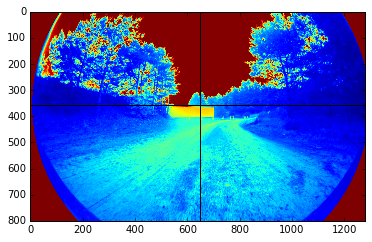

In [124]:
plt.figure("circle")
plt.cla()
img2 = img1
img2[rr > 1] = 255
plt.imshow(img2)
plt.axvline(center[0], color='k')
plt.axhline(center[1], color='k')
plt.show()

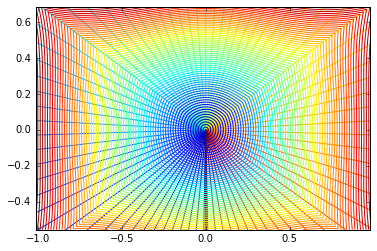

In [125]:
plt.contour(xx,yy,th,100,label="angle")
plt.contour(xx,yy,sr,100,label="square radius")
#plt.contour(xx,yy,rr,100,lable="circular radius")
plt.show()

In [126]:
def polar_to_xy(r, theta):
    x = r * np.sin(theta)
    y = r * np.cos(theta)
    return x,y 
def xy_to_idx(x,y):
    center = (650,358)
    radius = 642
    j = x * radius + center[0]
    i = y * radius + center[1]
    j = np.round(j).astype(int)
    i = np.round(i).astype(int)
    return i,j

In [127]:
def find_nearest(array,value, array2, value2):
  idx = (np.abs(array-value)+np.abs(array2-value2)).argmin()
  return np.unravel_index(idx, array.shape)

def create_map():
  global img1, ii, indices, sr, rr, th
  global progress, STOP
  global undist, map_
  global xy_to_idx, polar_to_xy
  STOP = False

  progress = 1/len(indices)
  for i,j in indices:
    _, _, idx = single_op((i,j), (rr, sr, th, xy_to_idx, polar_to_xy))
    map_.append(((i, j), idx))
    progress = progress + 1/len(indices)
    if STOP:
        break

def apply_map(img1, map_):
  undist = img1 * 0
  for (i,j), (dist_i, dist_j) in map_:
    if dist_i < 0: dist_i = np.nan
    if dist_j < 0: dist_j = np.nan
    try:
      undist[i,j] = img1[dist_i, dist_j]
    except:
      undist[i,j] = 0
  return undist

from functools import partial

def single_op(ij, fixed_data=None):
     rr, sr, th, xy_to_idx, polar_to_xy = fixed_data
     i,j = ij
     r = sr[i,j]
     theta = th[i,j]
     x, y = polar_to_xy(r, theta)
     idx = xy_to_idx(x,y)
     return i,j, idx

partial_single_op = partial(single_op, fixed_data=(rr, sr, th, xy_to_idx, polar_to_xy))

In [128]:
import threading

map_ = []
undist = img1 * 0
consumable_indices = list(indices)
progress = 0
STOP = False


t = threading.Thread(target=create_map)
t.start()


0.9999999999831031


/home/daniel/anaconda2/envs/ml3/lib/python3.4/site-packages/ipykernel/__main__.py:25: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


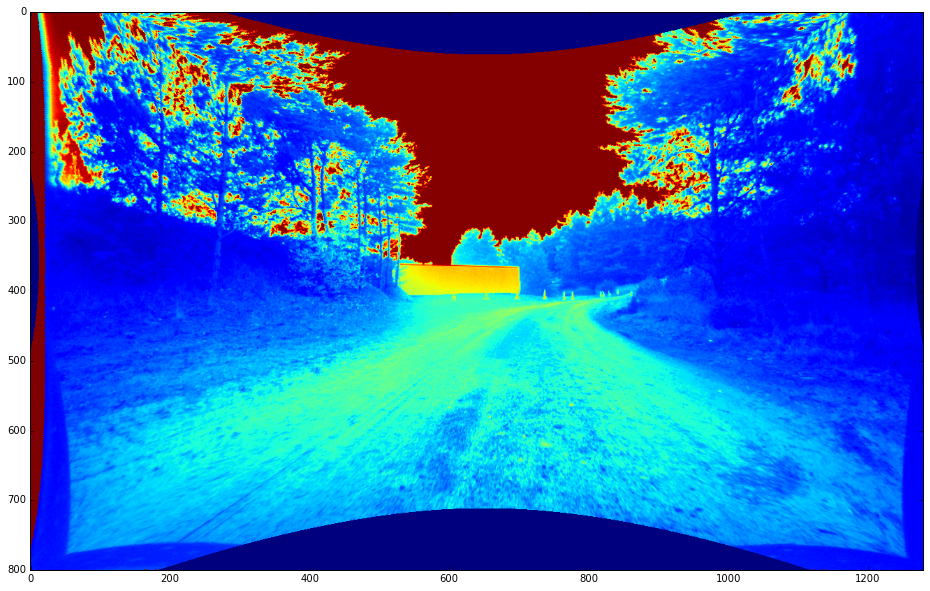

In [133]:
print(progress)
a = undist = apply_map(img1, map_)
plt.figure(figsize=(20,10))
plt.imshow(a)

In [71]:
with open('map.csv','w') as f:
    for item in map_:
        f.write(item.__str__())
        f.write('\n')

TypeError: can only concatenate tuple (not "str") to tuple

In [31]:
STOP = true
t.terminate()

In [136]:
map_[0].__str__()

'((0, 0), (44, 80))'